## EDA on Heart Failure Clinical Records Dataset

## About Dataset : 

The dataset provided for this project is focused on heart failure, a critical medical condition characterized by
the heart's inability to pump blood effectively, leading to inadequate circulation throughout the body. Here's an
overview of the dataset:

#### Dataset Link : https://drive.google.com/file/d/1bHcJpVEX0xBgzPw-VXc_6DcwSwkits64/view?usp=drive_link

## Title: Heart Failure Clinical Records Dataset

Source: The dataset was collected at the Faisalabad Institute of Cardiology and the Allied Hospital in
Faisalabad, Punjab, Pakistan, during the period of April to December in 2015. It was later made available on
Kaggle.


Description: The dataset comprises medical records of 299 patients diagnosed with heart failure. These records
include various clinical, body, and lifestyle information of the patients. The dataset encompasses 13 features,
providing insights into the patients' health status and potential risk factors for heart failure.


## Features :

Age: The age of the patient (numeric).

Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

Platelets: Platelet count in the blood (numeric).

Serum Creatinine: Level of creatinine in the blood (numeric).

Serum Sodium: Level of sodium in the blood (numeric).

Sex: Gender of the patient (binary: 0 for female, 1 for male).

Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

Time: Follow-up period (in days) for the patient's condition (numeric).

Death Events : Indicates whether the patient died during the follow-up period (binary: 0 for no, 1 for yes).

## Importing and reading dataset

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Data Understanding

In [18]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [31]:
## identifying the duplicat values/records
df.duplicated().sum()

0

In [20]:
## segregating numerical and categorical columns :
## categorical columns
categorical_columns = ['anaemia' , 'diabetes' ,'high_blood_pressure' ,'sex' ,'smoking' ,'DEATH_EVENT']

In [24]:
## numeric columns
numeric_col = []
for col in df.columns:
    if col not in  categorical_columns:
        numeric_col.append(col)
        
numeric_col

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [25]:
## statistics summary of numerical columns
df[numeric_col].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


#### Insights :
- The patients who are having the heart failure , their average age is 60.
- The mininum age patient of heart failure is 40 yr old. (Youngest heart failure patient)
- The maximum age patient of heart failure is 95 yr old. (Eldest heart failure patient)
- 25% patient are of age 51 and below 51.
- 50% patient are 60 years old and below it.
- 75% patient are 70 years old and below it.

In [30]:
## see the unique values of each categorical/binary column
for col in categorical_columns:
    print(f"Categories in {col} : {df[col].unique()}")
    print()

Categories in anaemia : [0 1]

Categories in diabetes : [0 1]

Categories in high_blood_pressure : [1 0]

Categories in sex : [1 0]

Categories in smoking : [0 1]

Categories in DEATH_EVENT : [1 0]



In [112]:
## value counts for each category of categorical columns
for col in categorical_columns:
    print(f"Categories in {col} : \n{df[col].value_counts()}")
    print()

Categories in anaemia : 
0    170
1    129
Name: anaemia, dtype: int64

Categories in diabetes : 
0    174
1    125
Name: diabetes, dtype: int64

Categories in high_blood_pressure : 
0    194
1    105
Name: high_blood_pressure, dtype: int64

Categories in sex : 
1    194
0    105
Name: sex, dtype: int64

Categories in smoking : 
0    203
1     96
Name: smoking, dtype: int64

Categories in DEATH_EVENT : 
0    203
1     96
Name: DEATH_EVENT, dtype: int64



## Analysis :

### Ques1 :  What is the distribution of age among heart failure patients in the dataset

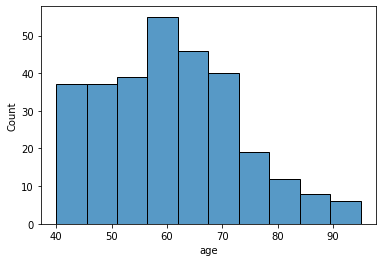

In [37]:
sns.histplot(df['age'])
plt.show()

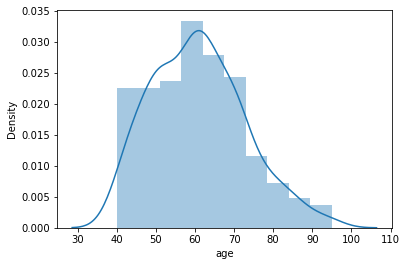

In [41]:
sns.distplot(df['age'])
plt.show()

- Most of the patients are from range of age 60 to 70 years.

### Ques2 : How does the death rate vary with age

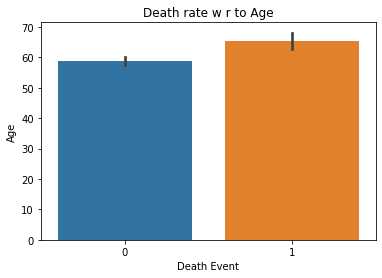

In [62]:
sns.barplot(x = df['DEATH_EVENT'] , y = df['age'])
plt.title("Death rate w r to Age")
plt.xlabel("Death Event")
plt.ylabel("Age")
plt.show()

### Ques3 : What is the percentage of male and female patients in the dataset?

In [56]:
sex = df['sex'].value_counts(normalize = True)
sex

1    0.648829
0    0.351171
Name: sex, dtype: float64

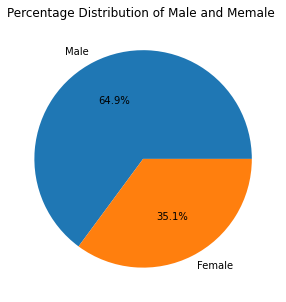

In [61]:
plt.figure(figsize = (10,5))
plt.pie(labels = ['Male' , 'Female'] , x = sex , autopct = "%1.1f%%")
plt.title("Percentage Distribution of Male and Memale ")
plt.show()

- There are around 65% male patient and 35% female patients.

### Ques4 :How does the platelet count vary among different age groups?

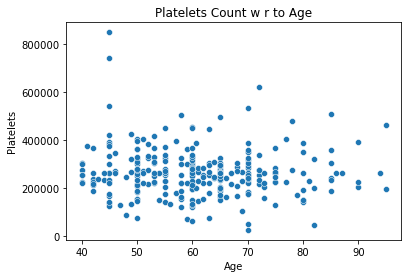

In [70]:
sns.scatterplot(x = df['age'], y = df['platelets'])
plt.title("Platelets Count w r to Age")
plt.xlabel("Age")
plt.ylabel("Platelets")
plt.show()

- As the age increases platelets getting decrease.

### Ques5 : Is there a correlation between creatinine and sodium levels in blood groups?

In [73]:
df[['creatinine_phosphokinase' ,'serum_sodium']].corr()

,creatinine_phosphokinase,serum_sodium
creatinine_phosphokinase,1.00000,0.05955
serum_sodium,0.05955,1.00000


- As we know that correlation values ranges between -1 to +1.
- +1 shows high positive linear relationship between variables.
- -1 shows high negative linear relationship between variables.
- 0 shows no ralation between variables.

- As 0.05 is very close to 0 , hence there is no relationship between creatinine and sodium levels in blood groups.


### Ques6 : How does the prevalence of high blood pressure differ between male and female genders

In [89]:
## count of male and female patients
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [90]:
## count of patients whose blood pressure is high
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [95]:
## count of male patients whose blood pressure is high
len(df[(df['sex'] == 1) & (df['high_blood_pressure'] == 1)])

61

In [96]:
## count of female patients whose blood pressure is high
len(df[(df['sex'] == 0) & (df['high_blood_pressure'] == 1)])

44

In [97]:
## count of male patients whose blood pressure is not high
len(df[(df['sex'] == 1) & (df['high_blood_pressure'] == 0)])

133

In [98]:
## count of female patients whose blood pressure is not high
len(df[(df['sex'] == 0) & (df['high_blood_pressure'] == 0)])

61

In [101]:
## % of male patients whose blood pressure is high

61/194*100

31.443298969072163

In [102]:
## % of female patients whose blood pressure is high

44/105*100

41.904761904761905

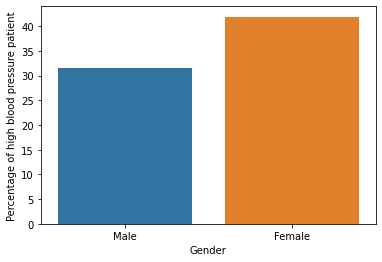

In [104]:
sns.barplot(x = ["Male" , 'Female'] , y = [31.443298969072163 , 41.904761904761905])
plt.xlabel("Gender")
plt.ylabel("Percentage of high blood pressure patient")
plt.show()

- There are more female patients whose blood pressure is high as compare to male.

### Ques7 : What is the relationship between smoking habits and heart failure?

In [107]:
# count of patient who smokes and not smokes
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [110]:
# Count of patients who survived and not survived
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [116]:
# count of patients who were smoker and did not survive.
len(df[(df['smoking'] == 1) & (df['DEATH_EVENT'] == 1)])

30

In [119]:
# count of patients who were not smoker and survided
len(df[(df['smoking'] == 0) & (df['DEATH_EVENT'] == 0)])

137

In [122]:
len(df[(df['smoking'] == 0) & (df['DEATH_EVENT'] == 1)])

66

In [120]:
## % of patients who were smoker and did not survive
30/96*100

31.25

In [144]:
## % of patients who were not smoker and did not survive
66/203*100

32.51231527093596

In [143]:
## % of patients who were not smoker and survive
137/203*100

67.48768472906403

- % of patients who were smoker and did not survive is 31.35%
- % of patients who were not smoker and survived is 67.48%.
- Hence those who don't smoke , there is high possibility that they can survive.

### Ques8 : Are there any noticeable patterns in the distribution of the death events accross different age groups?

In [132]:
grp = df.groupby(['age'])['DEATH_EVENT'].sum().reset_index()
grp.sort_values(by = 'DEATH_EVENT',ascending=False)

,age,DEATH_EVENT
20,60.000,13
10,50.000,8
26,65.000,8
31,70.000,7
5,45.000,6
34,75.000,6
38,80.000,5
32,72.000,5
15,55.000,3
19,59.000,3


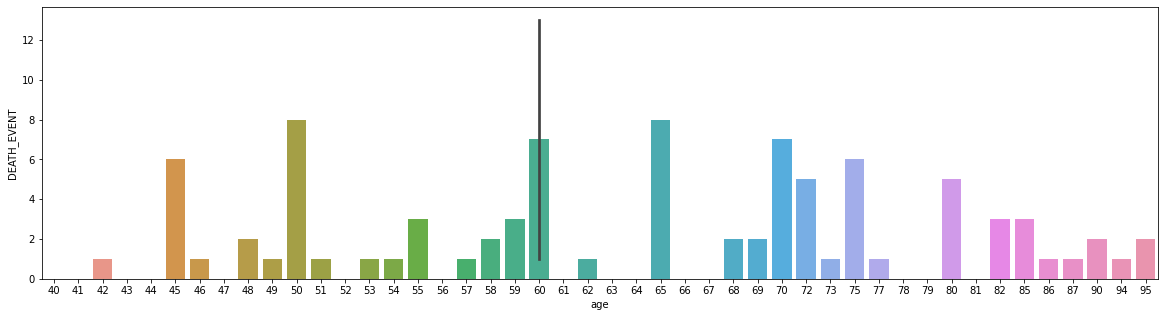

In [146]:
plt.figure(figsize = (20,5))
sns.barplot(x = grp['age'].astype(int) , y = grp['DEATH_EVENT'])
plt.show()

- Most of the death event are found in the group of age 60.

### Ques9 : Is there any significant difference in enjection fraction between patients with and without diabetes?

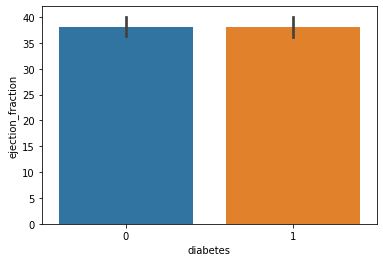

In [141]:
sns.barplot(x = df['diabetes'] , y = df['ejection_fraction'])
plt.show()

- As the value of ejection fraction for both types of patients who have diabetes and don't is same.
- Hence there is no significant difference in ejection fraction.

### Ques10 : How does the serum creatinine level vary between patients who survived and those who did not?

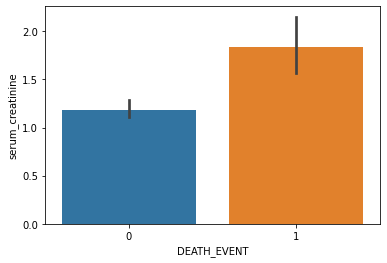

In [142]:
sns.barplot(x = df['DEATH_EVENT'] , y = df['serum_creatinine'])
plt.show()

- The serum creatinine level is high of those patients who did not survive.